# Grab DESI redshift distribution and generate LSST redshift distribution

In [2]:
import os
import sys
sys.path.insert(0, "/global/homes/q/qhang/desi/lya/codes/")
import numpy as np
import healpy as hp
from astropy.io import fits
import healpy
import lya_utils as lu
import pylab as pl

# grab the n(z)

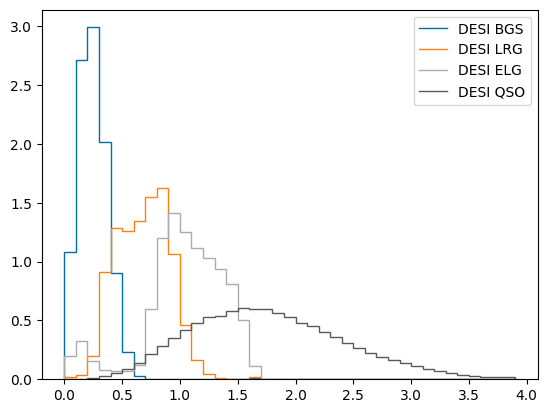

In [41]:
fname = "/global/homes/q/qhang/desi/dr1/nz_bgs_lrg_elg_qso.txt"
desi_nz = np.loadtxt(fname)
desi_label=["DESI BGS","DESI LRG","DESI ELG","DESI QSO"]

# normalize these distributions:
zz = desi_nz[:,0]
dz = zz[1]-zz[0]
edges = np.append(zz-dz/2., zz[-1] + dz/2.)
desi_norm_nz = np.zeros((len(zz),4))
for ii in range(4):
    desi_norm_nz[:,ii] = desi_nz[:,ii+1]/np.sum(desi_nz[:,ii+1])/dz
    pl.stairs(desi_norm_nz[:,ii],edges,label=desi_label[ii])
pl.legend()

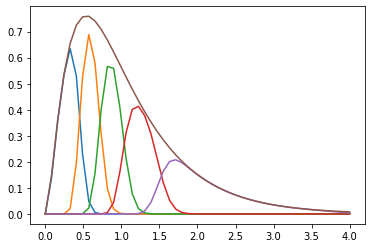

In [11]:
# generate nz of lsst source
n_bins=5
sigma_z = 0.05  # photo-z variance (scatter = 0.05 * (1 + z))
z_bias = 0
# compute srd n(z) for last bin:
redshift_range = np.linspace(0,4,50)
redshift_distribution = lu.srd_tot_nz(redshift_range)
srd_bins = lu.compute_equal_number_bounds(redshift_range, redshift_distribution, n_bins)

# Loop over the bins: each bin is defined by the upper and lower edge of the bin
lsst_nz = np.zeros((len(redshift_range), n_bins))
for ii in range(n_bins):
    x1 = srd_bins[ii]
    x2 = srd_bins[ii+1]
    lsst_nz[:,ii] = lu.true_redshift_distribution(x1, x2, sigma_z, z_bias, 
                                                  redshift_range, redshift_distribution)
    #useind = redshift_range<3
    #target_nz = np.c_[redshift_range[useind], source_nz[useind]]
    pl.plot(redshift_range, lsst_nz[:,ii])
pl.plot(redshift_range, redshift_distribution)

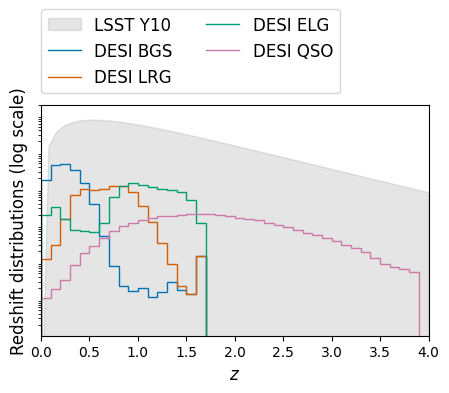

In [109]:
# now let's produce the plot:
# get colormap
pl.style.use('seaborn-colorblind')
pl.figure(figsize=[5,3])
redshift_distribution[0]=1e-9
#pl.plot(redshift_range, redshift_distribution, label="LSST 10 Year",color='salmon')
pl.fill_between(redshift_range,np.zeros(len(redshift_range)), redshift_distribution, 
                label='LSST Y10',
                alpha=0.2,color="grey")
#lsst_dz = redshift_range[1]-redshift_range[0]
#lsst_edges = np.append(redshift_range-lsst_dz/2., redshift_range[-1]+lsst_dz/2.)
#pl.stairs(redshift_distribution, lsst_edges, fill=True, label='LSST 10 Year',
#                alpha=0.2,color="grey")
#pl.plot(redshift_range,lsst_nz[:,-1])
desi_color=[
    "C0",
    "C2",
    "C1",
    "C3",
]
desi_label=[
    "DESI BGS",
    "DESI LRG",
    "DESI ELG",
    "DESI QSO"
]
for ii in range(4):
    pl.stairs(desi_nz[:,ii+1]/1e6*0.025,edges,label=desi_label[ii],color=desi_color[ii])
pl.legend(fontsize=12,ncol=2,loc=[0,1.05])
pl.yscale('log')
pl.yticks([])
pl.xlabel("$z$",fontsize=12)
pl.ylabel("Redshift distributions (log scale)",fontsize=12)
pl.xlim([0,4])
pl.ylim([1e-6,2])
pl.savefig("../plots/nz_lsst_desi.pdf",bbox_inches="tight")

In [54]:
sum(redshift_distribution)

12.249999999999996

In [56]:
0.168/27*sum(redshift_distribution)/sum(desi_nz[:,2]/1e6)

0.02499091711310608

In [110]:
for ii in range(4):
    print(sum(desi_nz[:,1 + ii])/sum(desi_nz[:,2])*0.168)

0.363728509896895
0.168
0.22102531379539064
0.0757123315203261


In [69]:
pl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']